In [2]:
!python3 --version

Python 3.10.8


In [3]:
!pip install kaggle

In [4]:
!pwd

/root/nfl_big_data_bowl/notebooks


In [4]:
!kaggle competitions download -c nfl-player-contact-detection -p data/raw/

100%|██████████████████████████████████████▉| 3.83G/3.84G [00:40<00:00, 124MB/s]
100%|██████████████████████████████████████| 3.84G/3.84G [00:44<00:00, 91.8MB/s]


In [ ]:
!unzip data/raw/nfl-player-contact-detection.zip -d data/raw/

Archive:  data/raw/nfl-player-contact-detection.zip
  inflating: data/raw/sample_submission.csv  
  inflating: data/raw/test/58168_003392_All29.mp4  
  inflating: data/raw/test/58168_003392_Endzone.mp4  
  inflating: data/raw/test/58168_003392_Sideline.mp4  
  inflating: data/raw/test/58172_003247_All29.mp4  
  inflating: data/raw/test/58172_003247_Endzone.mp4  
  inflating: data/raw/test/58172_003247_Sideline.mp4  
  inflating: data/raw/test_baseline_helmets.csv  
  inflating: data/raw/test_player_tracking.csv  
  inflating: data/raw/test_video_metadata.csv  
  inflating: data/raw/train/58168_003392_All29.mp4  
  inflating: data/raw/train/58168_003392_Endzone.mp4  
  inflating: data/raw/train/58168_003392_Sideline.mp4  
  inflating: data/raw/train/58172_003247_All29.mp4  
  inflating: data/raw/train/58172_003247_Endzone.mp4  
  inflating: data/raw/train/58172_003247_Sideline.mp4  
  inflating: data/raw/train/58173_003606_All29.mp4  
  inflating: data/raw/train/58173_003606_Endzone.mp4

In [5]:
!python3 -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


Number of frames: 711.0
Frame width: 1280.0
Frame height: 720.0


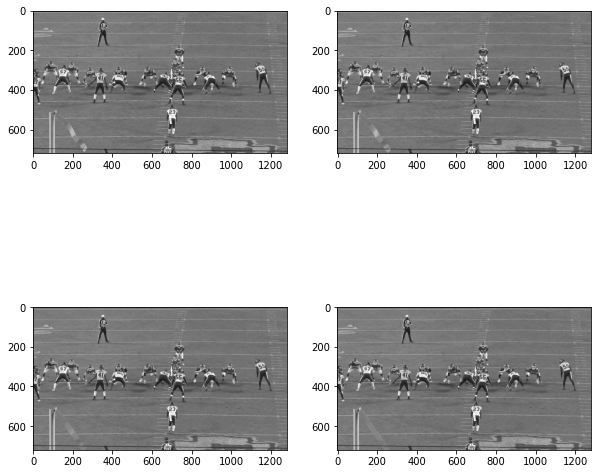

In [2]:
# First, let's import the necessary libraries
import cv2
import matplotlib.pyplot as plt

# Next, let's open the video file using cv2.VideoCapture
video_capture = cv2.VideoCapture('data/raw/train/58168_003392_Endzone.mp4')

# We can check if the video was opened successfully
# by calling the .isOpened() method on the VideoCapture object
if not video_capture.isOpened():
    print('Error opening video file')

# We can also get some basic information about the video
# such as the number of frames and the frame width and height
num_frames = video_capture.get(cv2.CAP_PROP_FRAME_COUNT)
frame_width = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
print(f'Number of frames: {num_frames}')
print(f'Frame width: {frame_width}')
print(f'Frame height: {frame_height}')

# Now let's read the video frame by frame
# We'll store the frames in a list so that we can display them later
frames = []
while True:
    # We can use the .read() method of the VideoCapture object
    # to read the next frame of the video
    ret, frame = video_capture.read()
    
    # If the .read() method returns False, it means we have reached the end of the video
    if not ret:
        break
    
    # We can process the frame here
    # For example, we can convert the frame to grayscale using cv2.cvtColor
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Let's store the processed frame in the list
    frames.append(frame)

# Now that we have processed all the frames, let's display them using matplotlib
# We'll use subplots to display multiple frames in a single figure
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()
for ax, frame in zip(axs, frames[:4]):
    ax.imshow(frame, cmap='gray')
plt.show()

# Finally, we can release the VideoCapture object to free up memory
video_capture.release()


In [20]:
# View the first few rows of the plays data
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,foulNFLId3,absoluteYardlineNumber,offenseFormation,personnelO,defendersInBox,personnelD,dropBackType,pff_playAction,pff_passCoverage,pff_passCoverageType
0,2021090900,97,(13:33) (Shotgun) T.Brady pass incomplete deep...,1,3,2,TB,DAL,TB,33,...,NaN,43.0,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0,Cover-1,Man
1,2021090900,137,(13:18) (Shotgun) D.Prescott pass deep left to...,1,1,10,DAL,TB,DAL,2,...,NaN,108.0,EMPTY,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 4 LB, 3 DB",TRADITIONAL,0,Cover-3,Zone
2,2021090900,187,(12:23) (Shotgun) D.Prescott pass short middle...,1,2,6,DAL,TB,DAL,34,...,NaN,76.0,SHOTGUN,"0 RB, 2 TE, 3 WR",6.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0,Cover-3,Zone
3,2021090900,282,(9:56) D.Prescott pass incomplete deep left to...,1,1,10,DAL,TB,TB,39,...,NaN,49.0,SINGLEBACK,"1 RB, 2 TE, 2 WR",6.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,1,Cover-3,Zone
4,2021090900,349,(9:46) (Shotgun) D.Prescott pass incomplete sh...,1,3,15,DAL,TB,TB,44,...,NaN,54.0,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,"3 DL, 4 LB, 4 DB",TRADITIONAL,0,Cover-3,Zone


In [21]:
# Plot a histogram of the points scored in each game
plt.hist(games['points'])
plt.show()

KeyError: 'points'

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.decomposition import PCA

# Define the data as a NumPy array
data = np.array([
    [40, 5, 70, 0, 150],
    [50, 6, 75, 2, 152],
    [60, 7, 80, 4, 160],
    [70, 8, 85, 6, 163],
    [80, 9, 90, 8, 167]
])

# Convert the array to a Pandas dataframe
df = pd.DataFrame(data, columns=['speed', 'acceleration', 'temperature', 'road_grade', 'consumption'])

# Define the dependent and independent variables
X = df[['speed', 'acceleration', 'temperature', 'road_grade']]
y = df['consumption']

# Use PCA to reduce the dimensionality of the independent variables
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add a constant term to the independent variables to allow for an intercept in the model
X_pca = sm.add_constant(X_pca)

# Fit the model using OLS (ordinary least squares) regression
model = sm.OLS(y, X_pca).fit()

# Print a summary of the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     90.67
Date:                Tue, 03 Jan 2023   Prob (F-statistic):            0.00246
Time:                        09:00:15   Log-Likelihood:                -7.8264
No. Observations:                   5   AIC:                             19.65
Df Residuals:                       3   BIC:                             18.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        158.4000      0.668    237.008      0.0

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
